In [6]:
from qiskit import QuantumCircuit, transpile, qasm2
from qiskit.transpiler import CouplingMap
from qiskit.visualization import plot_coupling_map
import matplotlib.pyplot as plt
import pyzx as zx

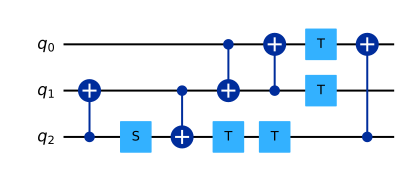

In [39]:
g = zx.generate.cliffordT(3, 10)
c = zx.Circuit.from_graph(g)
qc = QuantumCircuit.from_qasm_str(c.to_qasm())
qc.draw(output='mpl')

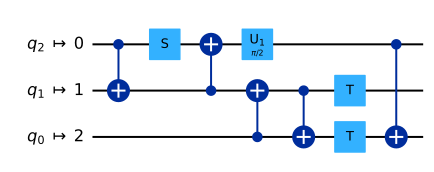

In [40]:
# All-to-All のトポロジーを作成
num_qubits = qc.num_qubits
all_to_all_coupling = CouplingMap.from_full(num_qubits)

# トランスパイル（最適化レベル3で実行）
optimized_circuit = transpile(qc, coupling_map=all_to_all_coupling, optimization_level=3)
optimized_circuit.draw(output='mpl')

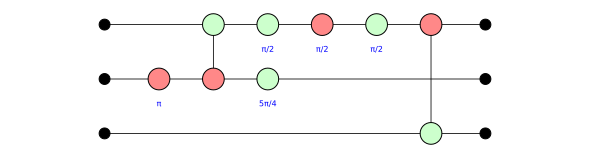

In [34]:
optimized_circ_pyzx = zx.Circuit.from_qasm(qasm2.dumps(optimized_circuit))
zx.draw_matplotlib(optimized_circ_pyzx.to_basic_gates())

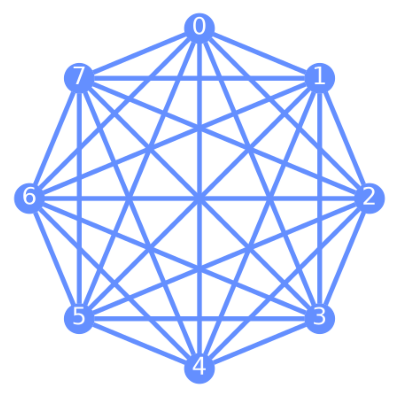

In [13]:
import itertools
import numpy as np
from qiskit.visualization import plot_coupling_map

# 量子ビット数
num_qubits = 8

# 円形に配置する座標を計算
radius = 2  # 円の半径
angles = np.linspace(0, 2 * np.pi, num_qubits, endpoint=False)
qubit_coordinates = [[radius * np.cos(angle), radius * np.sin(angle)] for angle in angles]

# All-to-All の結合マップ（すべての qubit 間を接続
all_to_all_coupling = CouplingMap.from_full(num_qubits)
coupling_map = all_to_all_coupling.get_edges()
# coupling_map = [list(pair) for pair in itertools.combinations(range(num_qubits), 2)]

# プロット
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)